### Random Sample Imputation 

#### Numerical Columns

In [99]:
import pandas as pd 
import numpy as np 
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [100]:
df.sample(5)

,Survived,Age,Fare
49,0,18.0,17.8000
26,0,NaN,7.2250
854,0,44.0,26.0000
527,0,NaN,221.7792
291,1,19.0,91.0792


In [101]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [102]:
x=df.drop('Survived', axis=1)
y=df['Survived']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [104]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [105]:
X_train.isnull().mean()*100

Age     19.662921
Fare     0.000000
dtype: float64

In [106]:
X_train['Age_Imputed']=X_train['Age']
X_test['Age_Imputed']=X_test['Age']

In [107]:
X_train.head()

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0


In [108]:
X_train['Age'][X_train['Age'].isnull()]

29    NaN
55    NaN
533   NaN
495   NaN
468   NaN
       ..
330   NaN
214   NaN
466   NaN
121   NaN
270   NaN
Name: Age, Length: 140, dtype: float64

In [109]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum(), random_state=42).values
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum(), random_state=42).values

In [110]:
X_train.head()

,Age,Fare,Age_Imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0


In [111]:
X_test.head()

,Age,Fare,Age_Imputed
709,NaN,15.2458,23.0
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0


Text(0.5, 1.0, 'Age Distribution')

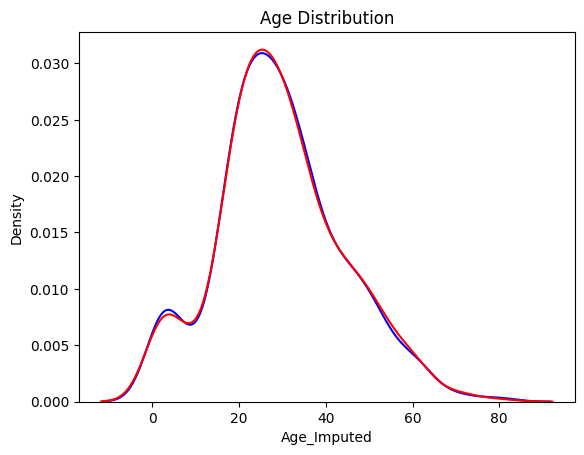

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.kdeplot(X_train['Age_Imputed'], color='blue', label='ImputedAge')
sns.kdeplot(X_train['Age'], color='red', label='OriginalAge')
plt.title('Age Distribution')

In [113]:
X_train.cov()

,Age,Fare,Age_Imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,54.857635
Age_Imputed,210.251707,54.857635,210.473571


In [114]:
print(X_train['Age'].var())
print(X_train['Age_Imputed'].var())

210.2517072477435
210.4735711815926


<Axes: >

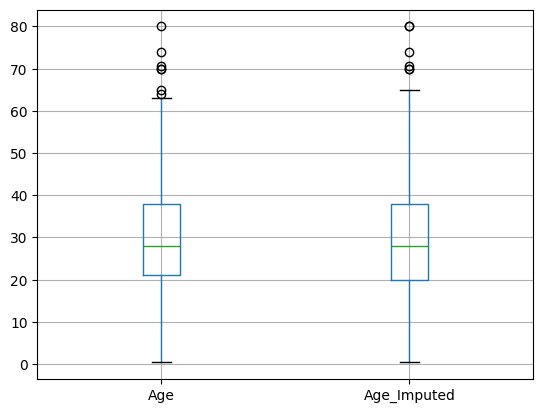

In [115]:
X_train[['Age', 'Age_Imputed']].boxplot()

### Random Sample Imputation of the Categorical Data

In [116]:
df1=pd.read_csv('housing_dataset.csv',usecols=['GarageQual', 'FireplaceQu','SalePrice'])

In [117]:
df1.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [118]:
df1.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [120]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(df1.drop('SalePrice',axis=1), df1['SalePrice'], test_size=0.2, random_state=42)

In [121]:
X_train.head()

,FireplaceQu,GarageQual
254,NaN,TA
1066,TA,TA
638,NaN,NaN
799,TA,TA
380,Gd,TA


In [122]:
X_train['GarageQual_Imputed']=X_train['GarageQual']
X_test['GarageQual_Imputed']=X_test['GarageQual']

In [138]:
X_train['GarageQual_Imputed'][X_train['GarageQual_Imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_Imputed'][X_test['GarageQual_Imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values